In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from scipy import stats
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import warnings

warnings.filterwarnings('ignore')

CSV file that contains every Oscars nomination from (1927-2015), categorized in the columns by the year of release, the number of the Oscars ceremony, the award category, the recipient of the award, and the film title.

In [59]:
oscar_noms = pd.read_csv('oscar_nominees.csv')

Dropped the column that represents the n-th Oscars ceremony that this nomination was given. Instead, the year of the Oscars was used.

Originally, the oscar wins were represented by either 1.0 or NaN. These were converted into boolean values.

In [60]:
oscar_noms.Winner = oscar_noms.Winner.fillna(0)

for i,j in oscar_noms.iterrows():
    if 'Actor' in j.Award or 'Actress' in j.Award:
        k = j.Name
        m = j.Film
        oscar_noms.at[i, 'Name'] = m
        oscar_noms.at[i, 'Film'] = k
        
oscar_noms.Award = oscar_noms.Award.replace(['Cinematography (Color)','Cinematography (Black and White)'],'Cinematography')
oscar_noms.Award = oscar_noms.Award.replace(['Actor','Actress','Actor in a Leading Role','Actress in a Leading Role','Actor in a Supporting Role','Actress in a Supporting Role'],'Acting')

In [61]:
for i in range(0, len(oscar_noms.Name)):
    oscar_noms.loc[i,'Name'] =  oscar_noms.loc[i,'Name'].strip()

The oscar nominations were organized by year and within each year, the nominations were alphabetized by award category. 1962 was used as the starting year in this study as that was when all of the major categories at the Oscars effectively came to fruition in a way that would make the analysis below feasible. 

In [62]:
ind = oscar_noms.index[(oscar_noms.Award == 'Acting') & (oscar_noms.Year == '1962')][0]
oscar_noms = oscar_noms[oscar_noms.index >= ind]

This a subset of the oscar nominations that contains the best picture nominees.

In [63]:
best_picture_noms = oscar_noms[oscar_noms.Award == 'Best Picture']

Subset of the oscar nominations that contains the directing nominees.

In [64]:
directing_noms = oscar_noms[(oscar_noms.Award == 'Directing') & (oscar_noms.index >= ind)]

Subset of the oscar nominations that contains the lead acting nominations. The changes in the names of the categories over time were accounted for.

In [65]:
act_noms = oscar_noms[(oscar_noms.Award == 'Acting') & (oscar_noms.index >= ind)]


In [66]:
for i,j in oscar_noms.iterrows():
    if 'Award' in j.Award and i >= ind:
        oscar_noms = oscar_noms.drop([i])

Susbets of the oscar nominations for cinematography and editing. Earlier films were distinguised between 'Black and White' and 'Color' for the cinematography category in the earlier years.

In [67]:
cinema_noms = oscar_noms[((oscar_noms.Award == 'Cinematography') | (oscar_noms.Award == 'Cinematography (Color)') | 
                         (oscar_noms.Award == 'Cinematography (Black and White)') & (oscar_noms.index >= ind))]

editing_noms = oscar_noms[((oscar_noms.Award == 'Film Editing') & (oscar_noms.index >= ind))]
                                            

Susbets for the writing and musical score categories. Since these award categories took on different names over time and the writing was categorized by original or adapted, the dataframes below were acquired by searching for relevant substrings in the 'Award' column of the original dataset.

In [68]:
oscar_noms = oscar_noms.reset_index(drop = True)

In [69]:
# Initializing dataframes
writing_noms = pd.DataFrame()
oscar_noms.Award = oscar_noms.Award.replace(['Writing (Original Screenplay)','Writing (Adapted Screenplay)', 'Writing (Screenplay, Based on Material from Another Medium)',
       'Writing (Story and Screenplay, Written Directly for the Screen)',
       'Writing (Story and Screenplay, Based on Material Not Previously Published or Produced)',
       'Writing (Story and Screenplay, Based on Factual Material or Material Not Previously Published or Produced)',
     'Writing (Screenplay Adapted from Other Material)',
       'Writing (Screenplay Written Directly for the Screen, Based on Factual Material or on Story Material Not Previously Published or Produced)',
       'Writing (Screenplay Based on Material from Another Medium)',
       'Writing (Screenplay Written Directly for the Screen)',
       'Writing (Screenplay Based on Material Previously Produced or Published)' ],'Writing') 

# Adding series rows to the dataframes based on the award category
for i, j in oscar_noms.iterrows():
    if 'Writing' in j.Award:
        writing_noms = writing_noms.append(oscar_noms[oscar_noms.index == i])                                                

A DataFrame representing all of the major oscar categories from above.

In [70]:
major_oscar_noms = pd.DataFrame()
major_oscar_noms = major_oscar_noms.append(directing_noms)
major_oscar_noms = major_oscar_noms.append(act_noms)
major_oscar_noms = major_oscar_noms.append(cinema_noms)
major_oscar_noms = major_oscar_noms.append(editing_noms)
major_oscar_noms = major_oscar_noms.append(writing_noms)

In [71]:
best_picture_noms = oscar_noms[oscar_noms.Award == 'Best Picture']
major_oscar_noms = major_oscar_noms.append(best_picture_noms)

In [72]:
oscar_noms.head()

,Year,Ceremony,Award,Winner,Name,Film
0,1962,35,Acting,0.0,Birdman of Alcatraz,Burt Lancaster
1,1962,35,Acting,0.0,Days of Wine and Roses,Jack Lemmon
2,1962,35,Acting,0.0,Divorce--Italian Style,Marcello Mastroianni
3,1962,35,Acting,0.0,Lawrence of Arabia,Peter O'Toole
4,1962,35,Acting,1.0,To Kill a Mockingbird,Gregory Peck


In [73]:
oscar_noms = oscar_noms.drop(['Year','Ceremony', 'Film'], axis = 'columns')
major_oscar_noms = major_oscar_noms.drop(['Year','Ceremony','Film'], axis = 'columns')

In [74]:
new_major_noms = major_oscar_noms.drop(['Winner'], axis = 'columns')
oscar_noms = oscar_noms.reset_index(drop=True, inplace=False)
major_oscar_noms = major_oscar_noms.reset_index(drop=True, inplace=False)

In [75]:
new_major_noms = new_major_noms.sort_values(by='Name')
new_major_noms = new_major_noms.reset_index(drop = True)
new_major_noms = new_major_noms.reindex(columns = ['Name','Award'])
new_major_noms.head()

,Name,Award
0,'Crocodile' Dundee,Writing
1,'Round Midnight,Acting
2,...And Justice for All,Writing
3,...And Justice for All,Acting
4,12 Monkeys,Acting


In [76]:
new_major_noms.head()

,Name,Award
0,'Crocodile' Dundee,Writing
1,'Round Midnight,Acting
2,...And Justice for All,Writing
3,...And Justice for All,Acting
4,12 Monkeys,Acting


In [77]:
awards = np.unique(new_major_noms.Award)
awards

array(['Acting', 'Best Picture', 'Cinematography', 'Directing',
       'Film Editing', 'Writing'], dtype=object)

In [78]:
column_names = ['Name','Writing', 'Acting', 'Directing', 'Film Editing', 'Cinematography','Best Picture']

In [79]:
major_noms = pd.DataFrame(columns = column_names)

In [80]:
major_noms.Name = np.unique(new_major_noms.Name)

In [81]:
major_noms = major_noms.fillna(0)

In [82]:
major_noms = major_noms.set_index('Name')

In [83]:
for i,j in major_oscar_noms.iterrows():
    if j.Award != 'Best Picture':
        major_noms.loc[j.Name,j.Award] = 1
    elif j.Winner == 0:
        major_noms.loc[j.Name,j.Award] = 1
    elif j.Winner == 1:
        major_noms.loc[j.Name,j.Award] = 2
        

In [84]:
column_names.remove('Best Picture')
column_names.remove('Name')


In [85]:
major_noms_red = major_noms[(major_noms['Best Picture'] == 1) | (major_noms['Best Picture'] == 2)]

In [86]:
major_noms_red.head()

,Writing,Acting,Directing,Film Editing,Cinematography,Best Picture
Name,,,,,,
12 Years a Slave,1,1,1,1,0,2
127 Hours,1,1,0,1,0,1
A Beautiful Mind,1,1,1,1,0,2
A Clockwork Orange,1,0,1,1,0,1
A Few Good Men,0,1,0,1,0,1


In [87]:
model = tree.DecisionTreeClassifier()
inputs_n = major_noms_red.drop(['Best Picture'], axis = 'columns')
target = major_noms_red['Best Picture']

In [88]:
best_pic_wins = major_noms_red[major_noms_red['Best Picture'] == 2]

In [89]:
best_pic_noms = major_noms_red[major_noms['Best Picture'] == 1].sample(n = 55)

In [90]:
major_noms_big = pd.DataFrame()
major_noms_big = major_noms_big.append(best_pic_noms)
major_noms_big = major_noms_big.append(best_pic_wins)

In [91]:
inputs_red = major_noms_big.drop(['Best Picture'], axis = 'columns')
target_red = major_noms_big['Best Picture']

In [92]:
awards_train, awards_test, best_pic_train, best_pic_test = train_test_split(inputs_red, target_red, test_size = 0.3, random_state = 15)

In [93]:
model.fit(awards_train,best_pic_train)

DecisionTreeClassifier()

In [94]:
model.score(awards_test,best_pic_test)

0.6666666666666666

[Text(458.8815789473684, 847.1100000000001, 'Directing <= 0.5\ngini = 0.499\nsamples = 77\nvalue = [40, 37]'),
 Text(146.8421052631579, 693.0900000000001, 'Film Editing <= 0.5\ngini = 0.219\nsamples = 16\nvalue = [14, 2]'),
 Text(73.42105263157895, 539.0700000000002, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(220.26315789473682, 539.0700000000002, 'Cinematography <= 0.5\ngini = 0.32\nsamples = 10\nvalue = [8, 2]'),
 Text(146.8421052631579, 385.05000000000007, 'gini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(293.6842105263158, 385.05000000000007, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(770.921052631579, 693.0900000000001, 'Film Editing <= 0.5\ngini = 0.489\nsamples = 61\nvalue = [26, 35]'),
 Text(513.9473684210526, 539.0700000000002, 'Acting <= 0.5\ngini = 0.426\nsamples = 13\nvalue = [9, 4]'),
 Text(440.52631578947364, 385.05000000000007, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(587.3684210526316, 385.05000000000007, 'Cinematography <= 0.5\ngini = 0.48\nsam

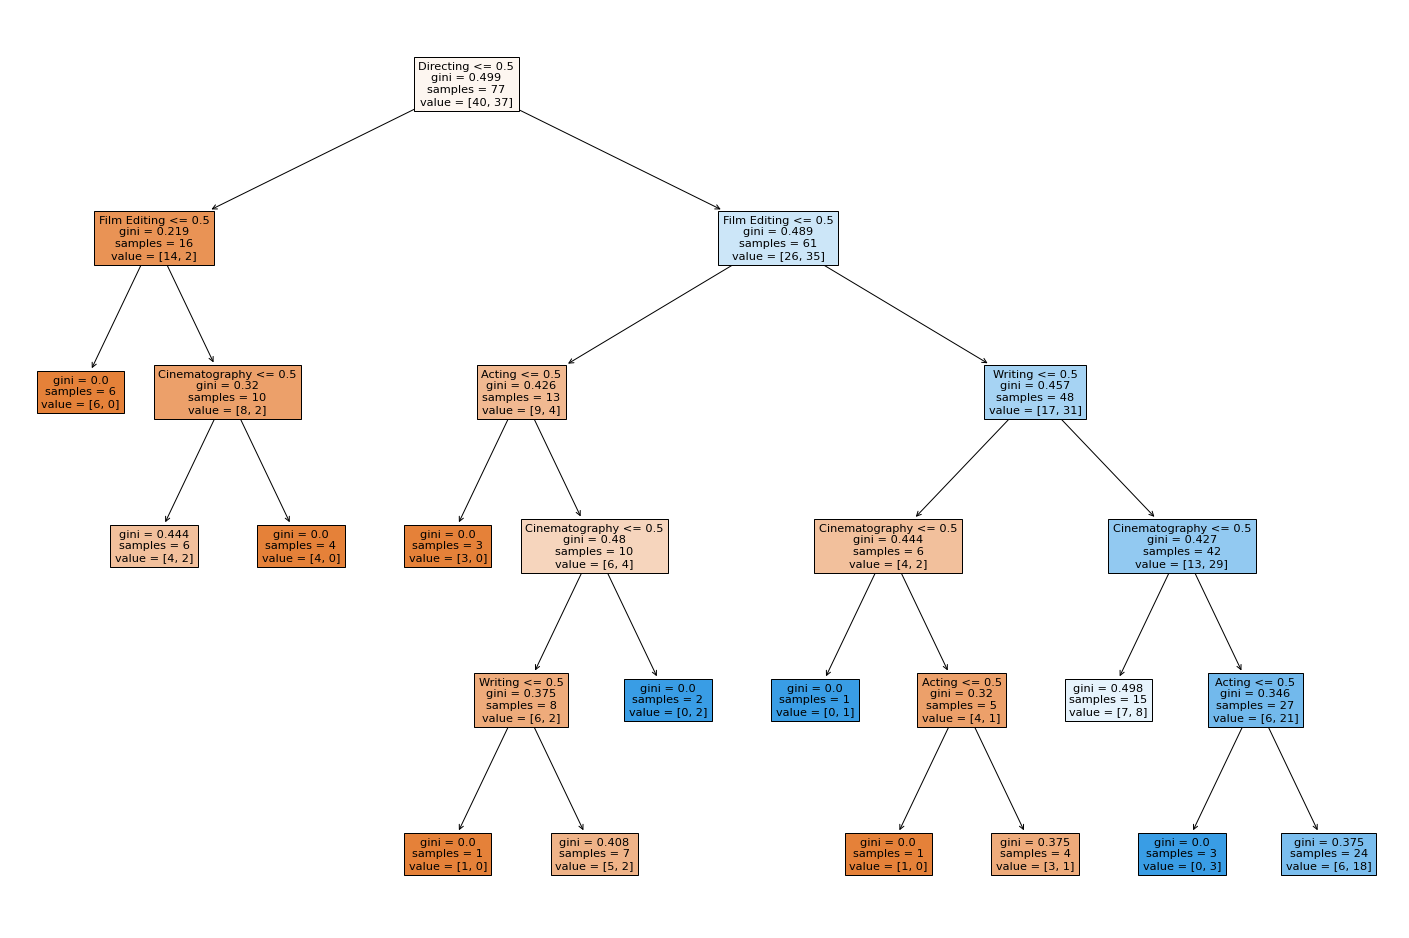

In [95]:
plt.figure(figsize=(25,17))
tree.plot_tree(model,filled=True,feature_names=column_names)

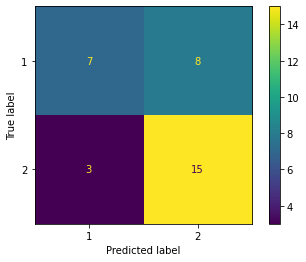

array([1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2], dtype=int64)

In [96]:
predictions = model.predict(awards_test)
cm = confusion_matrix(best_pic_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=model.classes_)

disp.plot()
plt.show()
predictions

In [97]:
major_nom_sum = inputs_n.sum(axis=1)

Text(0, 0.5, 'Number of Films')

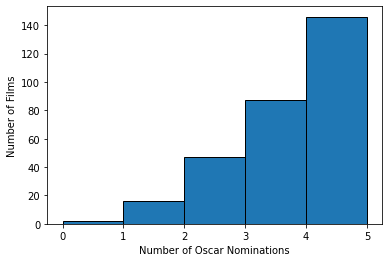

In [98]:
plt.hist(major_nom_sum, bins=5, ec='black')  
plt.xlabel('Number of Oscar Nominations')
plt.ylabel('Number of Films')

In [99]:
major_noms_count = major_noms_big
major_noms_count['total_major_noms'] = list(major_noms_count.drop(['Best Picture'], axis = 'columns').sum(axis=1))

In [100]:
major_noms_count.head()

,Writing,Acting,Directing,Film Editing,Cinematography,Best Picture,total_major_noms
Name,,,,,,,
An Unmarried Woman,1,1,0,0,0,1,2
Doctor Dolittle,0,0,0,1,1,1,2
Inception,1,0,0,0,1,1,2
The Reader,1,1,1,0,1,1,4
Quiz Show,1,1,1,0,0,1,3


In [101]:
major_noms_count = major_noms_count.drop(['Writing','Acting','Directing','Film Editing','Cinematography'], axis = 'columns')
major_noms_count = major_noms_count.reindex(columns = ['total_major_noms','Best Picture'])
major_noms_count.head()

,total_major_noms,Best Picture
Name,,
An Unmarried Woman,2,1
Doctor Dolittle,2,1
Inception,2,1
The Reader,4,1
Quiz Show,3,1


In [102]:
major_count = major_noms_count['total_major_noms']
best_pic = major_noms_count['Best Picture']

In [103]:
count_train, count_test, best_pic_train, best_pic_test = train_test_split(major_count, best_pic, test_size = 0.3, random_state = 10)

In [104]:
model.fit(np.array(count_train).reshape(-1,1),best_pic_train)

DecisionTreeClassifier()

In [105]:
model.score(np.array(count_test).reshape(-1,1),best_pic_test)

0.5757575757575758

[Text(697.5, 770.1000000000001, 'X[0] <= 3.5\ngini = 0.5\nsamples = 77\nvalue = [38, 39]'),
 Text(348.75, 462.06000000000006, 'X[0] <= 2.5\ngini = 0.238\nsamples = 29\nvalue = [25, 4]'),
 Text(174.375, 154.0200000000001, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(523.125, 154.0200000000001, 'gini = 0.332\nsamples = 19\nvalue = [15, 4]'),
 Text(1046.25, 462.06000000000006, 'X[0] <= 4.5\ngini = 0.395\nsamples = 48\nvalue = [13, 35]'),
 Text(871.875, 154.0200000000001, 'gini = 0.469\nsamples = 24\nvalue = [9, 15]'),
 Text(1220.625, 154.0200000000001, 'gini = 0.278\nsamples = 24\nvalue = [4, 20]')]

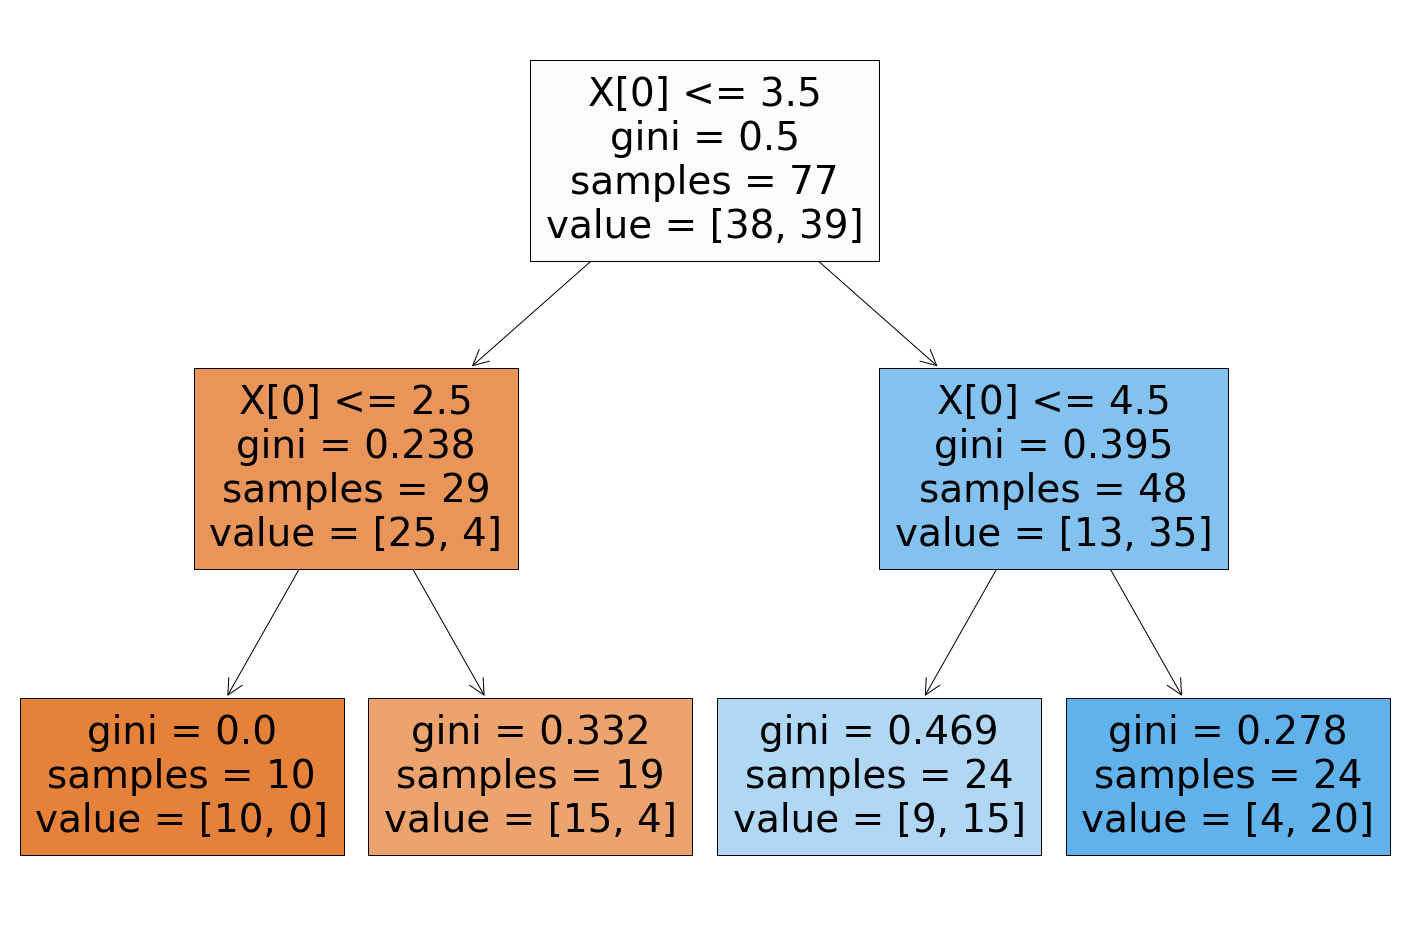

In [106]:
plt.figure(figsize=(25,17))
tree.plot_tree(model,filled=True)

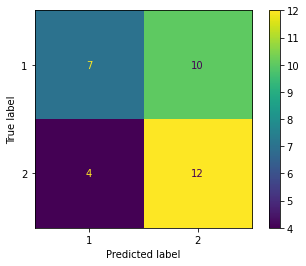

array([2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1], dtype=int64)

In [107]:
predictions = model.predict(np.array(count_test).reshape(-1,1))
cm = confusion_matrix(best_pic_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=model.classes_)

disp.plot()
plt.show()
predictions